## 평균제곱근 오차RMSE
* 최소제곱법을 이용해서 회귀직선을 그어 보았지만 다양한 상황에 적합한 직선을 긋기에는 부족
* 즉, 여러 개의 독립변수로 구성된 데이터에 대한 회귀직선을 긋기에는 무리가 있음
* 따라서, 여러 독립변수로 구성된 데이터의 경우 임의의 선을 그린 후 
* 이 선의 오차를 평가하고 조금씩 수정해 나가는 방법이 필요
    + 주어진 선의 오차를 평가하는 방법 : ``평균제곱근오차``
    + (실제값 - 예측값)의 제곱합 나누기 데이터갯수의 제곱근 
    + $ \sqrt {\frac {\sum (y - \hat y)^2} {n}} $
* 최소제곱법에서는 ``공식`` 을 이용해서 바로 기울기/절편 계산
* 한편, 평균제곱근오차에서는 기울기와 절편에 ``아무값`` 이나 대입하고 오차를 구해서 
``오차가 최소가되는 지점을 찾는 방식`` 을 사용

## 최소제곱법OLS
* 선형방정식의 회귀계수를 구하는 일반적인 방법
* $ a = \frac {\sum (x - \bar x)(y - \bar y) } {\sum (x - \bar x) ^ 2}  $
* $ b = \bar y - (a \cdot \bar x) $

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score

## 기울기와 절편의 관계

In [3]:
# ex) 공부한 시간 대비 성적을 예측하는 모델을 생성
# 만일, 10시간 공부하면 점수는 얼마인가?
time = np.array([2,4,6,8]).reshape(-1,1)
jumsu = np.array([81,93,91,97]).reshape(-1,1)

lr = LinearRegression()
lr.fit(time, jumsu)

a, b = lr.coef_, lr.intercept_

z = np.array([ (a*x + b) for x in time ]).reshape(-1,1)
c = mean_squared_error(jumsu, z)

(a, b, np.sqrt(c))

print(lr.coef_, lr.intercept_, mean_squared_error(time, jumsu))

[[2.3]] [79.] 7327.0


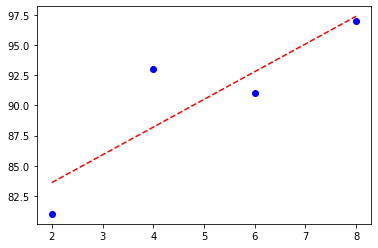

In [4]:
z = np.array([ (a*x + b) for x in time ]).reshape(-1,1)
plt.plot(time, jumsu, 'bo')
plt.plot(time, z, 'r--')
plt.show()

3.3166247903554


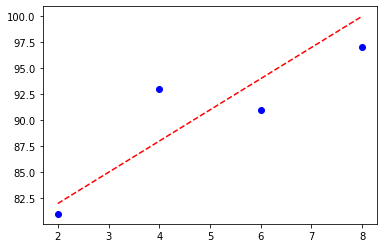

In [5]:
# 1 - 기울기:3, 절편: 76
a, b = 3, 76
z = np.array([ (a*x + b) for x in time ]).reshape(-1,1)
print(np.sqrt(mean_squared_error(jumsu,z)))

plt.plot(time, jumsu, 'bo')
plt.plot(time, z, 'r--')
plt.show()


12.449899597988733


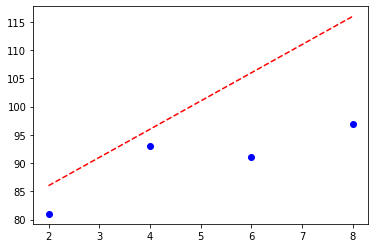

In [6]:
# 2 - 기울기:5, 절편: 76
a, b = 5, 76
z = np.array([ (a*x + b) for x in time ]).reshape(-1,1)
print(np.sqrt(mean_squared_error(jumsu,z)))

plt.plot(time, jumsu, 'bo')
plt.plot(time, z, 'r--')
plt.show()

10.344080432788601


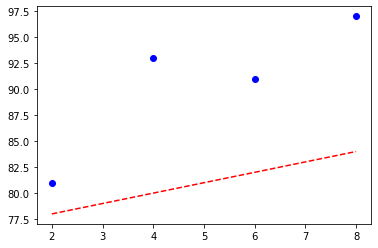

In [7]:
# 3 - 기울기:1, 절편: 76
a, b = 1, 76
z = np.array([ (a*x + b) for x in time ]).reshape(-1,1)
print(np.sqrt(mean_squared_error(jumsu,z)))

plt.plot(time, jumsu, 'bo')
plt.plot(time, z, 'r--')
plt.show()

5.5677643628300215


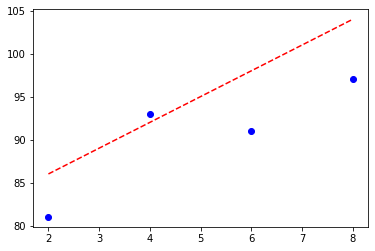

In [8]:
# 4 - 기울기:3, 절편: 80
a, b = 3, 80
z = np.array([ (a*x + b) for x in time ]).reshape(-1,1)
print(np.sqrt(mean_squared_error(jumsu,z)))

plt.plot(time, jumsu, 'bo')
plt.plot(time, z, 'r--')
plt.show()

6.4031242374328485


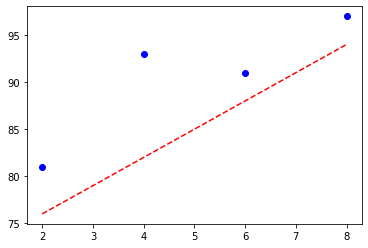

In [9]:
# 5 - 기울기:3, 절편: 70
a, b = 3, 70
z = np.array([ (a*x + b) for x in time ]).reshape(-1,1)
print(np.sqrt(mean_squared_error(jumsu,z)))

plt.plot(time, jumsu, 'bo')
plt.plot(time, z, 'r--')
plt.show()

## 결론
* 기울기가 커지면(3 -> 5) 오차가 증가함 (3.3 -> 12.4)
* 기울기가 작아지면(3 -> 1) 오차가 증가함 (3.3 -> 10.3)
    + 즉, 기울기와 오차간의 상관관계가 존재함


## 기울기의 변환에 따른 오차의 변화를 그래프로 시각화

In [10]:
weights = []  # 통계: 기울기, 머신러닝/딥러닝: 가중치
b = 0         # 절편: 상수이므로 편의상 0으로 설정
loss = []     # 오차

In [11]:
for w in range(-20, 60):
    z = [ w * x + b for x in time ]
    weights.append(w)  # 그래프에서 x축에 사용
    loss.append(mean_squared_error(jumsu, z))  # 그래프에서 y축에 사용

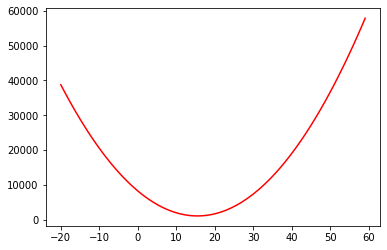

In [12]:
plt.plot(weights, loss, 'r')
plt.show()

## 기울기와 오차의 관계
* 그래프에서 확인하듯이 기울기와 오차의 관계는 이차함수 형태임
* 오차가 가장 작은 부분은? 
    + 그래프 하단의 볼록한 부분
* 기울기를 구하는 방법
    + 임의의 점을 선택 -> 미분 실시 -> 기울기가 0인지 확인
    + 기울기가 0일때까지 계속 반복 시행
    + 미분의 기울기를 이용한 **경사하강법**을 적용

## 경사하강법gradient descent
* 머신러닝 및 딥러닝 알고리즘을 학습시킬때 사용하는 방법
* 실제값과 예측값의 오차가 **손실함수(Loss Function)** 라 함
    + 즉, 이 손실 함수가 0에 가깝게 줄어들게 만드는 것이 학습의 목표
    + 이 오차를 비용이라고 판단하여, **비용함수(Cost Funtion)** 라고도 함
* 손실함수의 최소값을 찾기 위해, 임의의 가중치를 설정하고 그 점에서 미분(기울기)을 계산하고, 
* 이 값이 적합한지 계속 탐색하는 과정을 반복
> *앞이 보이지 않는 안개가 낀 산을 내려올 때는 
> 모든 방향으로 산을 더듬어가며 
> 산의 높이가 가장 낮아지는 방향으로 한 발씩 내딛어갈 수 있다*
* 우리가 주로 실제 분석에서 맞딱드리게 되는 손실함수들은 형태가 복잡해 (가령, 비선형함수) 미분계수와 그 근을 계산하기 어려운 경우가 많고,
* 실제 미분계수를 계산하는 과정을 컴퓨터로 구현하는 것이 어렵기 때문에 경사하강법을 사용함
* sklearn에서는 SGDRegressor를 제공

## 경사 하강법의 한계점
* 실제 손실함수는 저렇게 깔끔한 이차 함수 형태를 띄지 않음 
    + 복잡한 형태의 다차 함수를 띔
* 데이터셋이 많아지면, 당연히 계산량도 무지막지하게 많아짐 
    + 그로 인해 학습 속도가 매우 느려짐
* 랜덤 하게 선택된 가중치가 **지역최소해**Local minimum에 수렴해버리면, 실제 목표인 **전역최소해**Global minimum을 찾지 못하는 문제가 발생할 수 있음
* 손실함수의 모양이 전반적으로 곡선이더라도, 이 곡선 안에 평탄한 영역plateau이 존재할 수도 있음
     + 이 영역에서는 학습속도가 매우 느려짐 
     + 더이상 학습이 진행되지 않는 가중치 소실 문제 발생
* 데이터의 형태에 따라 SGD, Adam, Momentum, Adagrad 등을 선택적으로 사용

# 피자크기에 따른 가격 예측하기

In [13]:
# 피자크기에 따른 가격 데이터가 다음과 같을때 
# 12인치 피자의 가격을 예측하시오 (독립변수 : 인치, 종속변수 : 달러)
pizza = [6,8,10,14,18]
dollar = [7,9,13,17.5,18]

# 경사하강법

In [14]:
# 흡연여부와 임신주차에 따른 신생아 몸무게 측정
# 37주차, 흡연일때 몸무게는?
# 40주차, 흡연일때 몸무게는?
# 42주차, 금연일때 몸무게는?

In [15]:
pg = pd.read_csv('../data/pregnant.txt', sep='\t')
pg.head()

,Wgt,Week,Smoke
0,2940,38,yes
1,3130,38,no
2,2420,36,yes
3,2450,34,no
4,2760,39,yes


In [16]:
# 독립변수들 중 일부(흡연여부)가 범주형 변수이므로
# 독립변수를 흡연/비흡연으로 나눠 회귀분석 실행

# 흡연하는 산모
sp = pg.loc[pg.Smoke =='yes', ['Wgt', 'Week']]
sp.head()

,Wgt,Week
0,2940,38
2,2420,36
4,2760,39
5,2440,35
7,3301,42


In [17]:
from sklearn.model_selection import train_test_split

data = sp.Week
target = sp.Wgt

Xtrain, Xtest, ytrain, ytest = \
    train_test_split( data, target, test_size=0.25, random_state=2208291505)


In [18]:
lr = LinearRegression()

lr.fit(np.array(Xtrain).reshape(-1,1), ytrain)
print(lr.coef_, lr.intercept_)

[135.41469489] -2352.388542963886


In [19]:
ypred = lr.predict(np.array(Xtest).reshape(-1,1))
MSE = mean_squared_error(ytest, ypred)
R2 = r2_score(ytest, ypred)
np.sqrt(MSE), R2

(110.35931134901647, 0.7766599867705355)

In [20]:
from sklearn.linear_model import SGDRegressor
#sgdclf = SGDRegressor(learning_rate='adaptive', verbose=0, random_state=2208291505)
sgdclf = SGDRegressor()
sgdclf.fit(np.array(Xtrain).reshape(-1,1), ytrain)
print(sgdclf.coef_, sgdclf.intercept_, sgdclf.n_iter_)

[8.33996877e+10] [2.61376245e+09] 6


In [21]:
# 비흡연하는 산모